In [51]:
from matplotlib import ticker
import pandas as pd
import numpy as np
# !pip install yfinance
import yfinance as yf
import datetime
from datetime import date
from datetime import datetime
from dateutil.relativedelta import relativedelta
import time
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader

# For reading stock data from yahoo
# from pandas_datareader.data import Datareader # pip install pandas_datareader

# Insert Stock data
# ticker = "AAPL"
start_date = datetime.now() - relativedelta(years=5) # Get date 5 years ago from today
end_date = date.today()

# Create empty dataframe
stock_df = pd.DataFrame()

# Download Stock Price Data
stock = []
# stock = yf.download(tickers = "AAPL MSFT AMZN TSLA NVDA GOOG GOOGL FB ASML AVGO", start=start_date, end=end_date)
ticker = "TSLA"
stock = yf.download(ticker, start=start_date, end=end_date)
stock_df = stock_df.append(stock, sort=False)
# Add stock symbol column
stock_df['Symbol'] = ticker

stock_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2017-04-06,59.375999,60.388000,58.820000,59.740002,59.740002,27603000,TSLA
2017-04-07,59.500000,60.537998,59.430000,60.507999,60.507999,22898000,TSLA
2017-04-10,61.830002,62.745998,61.742001,62.478001,62.478001,38322500,TSLA
2017-04-11,62.675999,62.694000,61.099998,61.742001,61.742001,28623000,TSLA
2017-04-12,61.268002,61.689999,59.264000,59.368000,59.368000,30253500,TSLA
...,...,...,...,...,...,...,...
2022-03-30,1091.170044,1113.949951,1084.000000,1093.989990,1093.989990,19955000,TSLA
2022-03-31,1094.569946,1103.140015,1076.640015,1077.599976,1077.599976,16330900,TSLA
2022-04-01,1081.150024,1094.750000,1066.640015,1084.589966,1084.589966,18012900,TSLA


Text(0, 0.5, 'Close Price USD ($)')

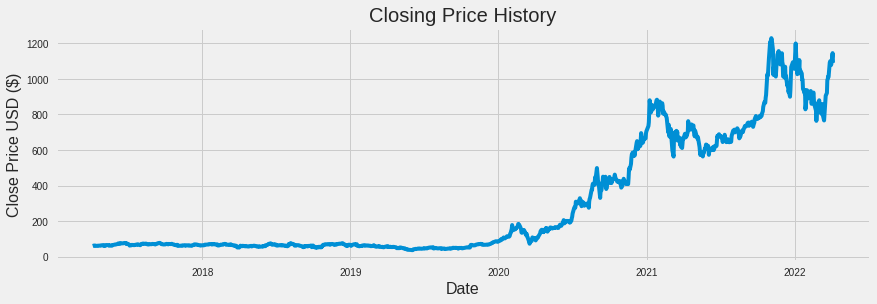

In [52]:
plt.figure(figsize=(13,4))
plt.plot(stock_df["Close"], label = 'TSLA Closing Price History')
plt.title('Closing Price History')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)

In [53]:
# Set style for plotting
plt.style.use('fivethirtyeight')

from datetime import datetime

In [54]:
# Place moving averages for 10, 30 and 60 days in new columns in the dataframe
ma_day = [10, 30, 60]

for ma in ma_day:
  column_name = f"MA for {ma} days"
  stock_df2 = stock_df
  stock_df2[column_name] = stock_df2['Adj Close'].rolling(ma).mean()

stock_df2

,Open,High,Low,Close,Adj Close,Volume,Symbol,MA for 10 days,MA for 30 days,MA for 60 days
Date,,,,,,,,,,
2017-04-06,59.375999,60.388000,58.820000,59.740002,59.740002,27603000,TSLA,NaN,NaN,NaN
2017-04-07,59.500000,60.537998,59.430000,60.507999,60.507999,22898000,TSLA,NaN,NaN,NaN
2017-04-10,61.830002,62.745998,61.742001,62.478001,62.478001,38322500,TSLA,NaN,NaN,NaN
2017-04-11,62.675999,62.694000,61.099998,61.742001,61.742001,28623000,TSLA,NaN,NaN,NaN
2017-04-12,61.268002,61.689999,59.264000,59.368000,59.368000,30253500,TSLA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-03-30,1091.170044,1113.949951,1084.000000,1093.989990,1093.989990,19955000,TSLA,1000.119983,889.216325,927.592161
2022-03-31,1094.569946,1103.140015,1076.640015,1077.599976,1077.599976,16330900,TSLA,1020.719983,894.356657,926.392328
2022-04-01,1081.150024,1094.750000,1066.640015,1084.589966,1084.589966,18012900,TSLA,1038.639978,901.297990,926.333494


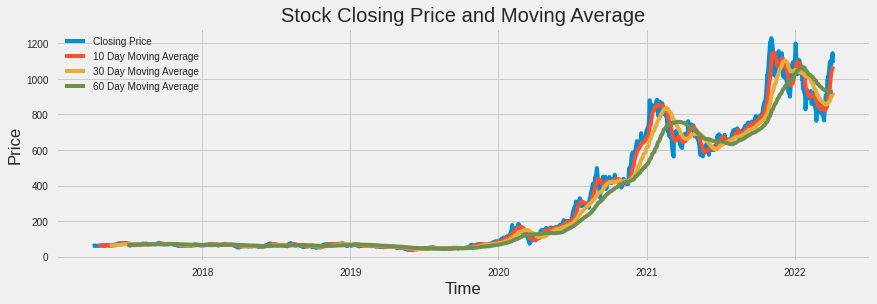

In [55]:
plt.figure(figsize=(13,4))
plt.plot(stock_df["Close"], label='Closing Price')
plt.plot(stock_df["MA for 10 days"], label='10 Day Moving Average')
plt.plot(stock_df["MA for 30 days"], label='30 Day Moving Average')
plt.plot(stock_df["MA for 60 days"], label='60 Day Moving Average')
plt.title("Stock Closing Price and Moving Average")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

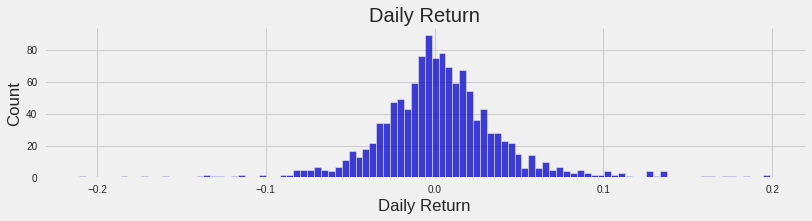

In [68]:
# Daily Return - gives us an idea if this will be normally ditributed or skewed and as to the accuracy
sns.displot(stock_df["Daily Return"].dropna(), bins=100, color='mediumblue', height =3, aspect = 23/6)
stock_df['Daily Return'] = stock_df['Adj Close'].pct_change()
plt.title("Daily Return")
plt.show()

In [69]:
# Create training and test dataset
# Create new dataframe with only Close column
data = stock_df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get number of rows to train the model on
training_data_len = int(np.ceil(len(dataset)*.95))
training_data_len

1197

In [73]:
# Scale the data
# !pip install sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02005333],
       [0.02069648],
       [0.02234624],
       ...,
       [0.87830323],
       [0.92926979],
       [0.88388899]])

In [75]:
# Create the training dataset
# Create the scaled training into data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
    # Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02005333, 0.02069648, 0.02234624, 0.02172988, 0.0197418 ,
       0.02094101, 0.02051224, 0.02031293, 0.0211956 , 0.02069146,
       0.02120899, 0.02161599, 0.02258072, 0.02197442, 0.02171649,
       0.02262762, 0.02409481, 0.02343491, 0.02211678, 0.01951067,
       0.02166959, 0.0214753 , 0.02383185, 0.02449511, 0.02414004,
       0.02442644, 0.02293077, 0.02312003, 0.02129441, 0.02245845,
       0.02208496, 0.02200456, 0.02091757, 0.02198279, 0.02308989,
       0.02448171, 0.02614989, 0.02713975, 0.02703255, 0.02694546,
       0.02819659, 0.0291228 , 0.03026172, 0.03199522, 0.02987147,
       0.03015453, 0.03299177, 0.03378064, 0.0328896 , 0.0322297 ,
       0.03196172, 0.03237039, 0.03306714, 0.03410724, 0.03424793,
       0.0332497 , 0.03071728, 0.0322029 , 0.03044595, 0.03058999])]
[0.029084278516964525]

[array([0.02005333, 0.02069648, 0.02234624, 0.02172988, 0.0197418 ,
       0.02094101, 0.02051224, 0.02031293, 0.0211956 , 0.02069146,
       0.02120899, 0.02161599, 0.0

In [76]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model - (Long short-term memory (LSTM) is an artificial recurrent neural network (RNN))
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Wait 45 seconds or so for model fit to run, it will spool up at about 20 seconds

1137/1137 [==============================] - 49s 41ms/step - loss: 0.0026


In [77]:
# Create the testing dataset
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [78]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

66.62246704626929

In [79]:
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
mape

6.053116619031624

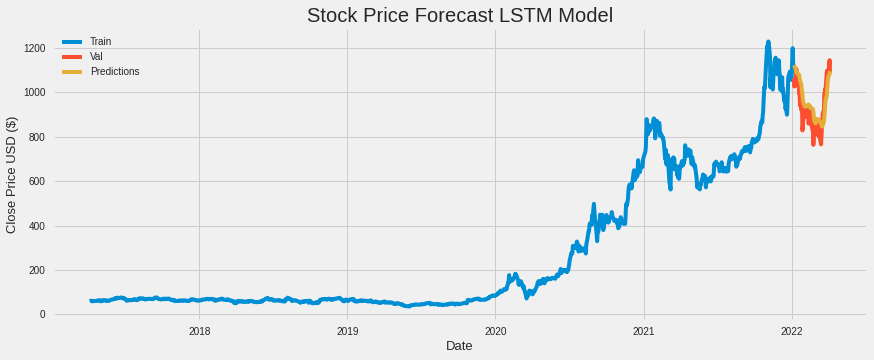

In [81]:
# Remove pandas warning on copy of a slice which is immaterial in this case
pd.options.mode.chained_assignment = None # default='warn'
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(13,5))
plt.title('Stock Price Forecast LSTM Model')
plt.xlabel('Date', fontsize=13)
plt.ylabel('Close Price USD ($)', fontsize=13)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()